### Dataset Reading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 
total = pd.read_csv('drive/My Drive/Constraint_Competition_Dataset/chinese2.csv')
#pd.set_option('display.max_colwidth',150)
data = total[:2000]
data.head()

,label,id,date,user_id,text,pic_url,video_url,comment_num,repost_num,like_num
0,fake,460b078edd44280dc2535535add5d2fa,2020-02-06 10:48,8b1bc48b06fb7ad014182cc91be44156,这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭😭 不是晚一点，是你不会si的...,[],http://f.video.weibocdn.com/000lGgVrlx07AJGBul...,4,2,30
1,fake,2ea0c40dbb900959069a62609f10909c,2020-07-03 10:51,40e2e17e668a3e6b01506f7fedd64bd6,#北京健康宝崩了#，没了健康宝，什么也做不了，#北京# 上班也迟到了，希望能尽快修好，加油健...,[],http://f.video.weibocdn.com/003exorvgx07ExKn4n...,0,0,0
2,fake,d7814922985f7b337347ffc0ff0eae56,2020-02-22 23:00,b75f00f6210a0e7543f623fbee435f37,【疫情当前，大意不得：全国已有12起复工后聚集性疫情发生】近期全国陆续复工，据不完全统计，复...,[],NaN,3,2,4
3,fake,e7ba5f3eab27e4d11acf903e1f7229c9,2020-02-19 11:24,ab592925d8db644da43c77b9ce5f8885,学校开学时间：高三，初三，3月2日开学，高一，高二，初一，初二，3月9日开学，小学4一6年级...,[],NaN,0,0,0
4,real,7c2139967ecfdbddd3a5802e33b43802,2020-08-29 06:42,43a971db6364c4ed7cd101feca243600,【#美国新冠确诊病例超590万例#】据美国约翰斯·霍普金斯大学全球新冠肺炎疫情实时监测系统显...,['https://wx4.sinaimg.cn/orj360/a716fd45ly1gi7...,NaN,461,248,2224


In [3]:
data.shape

(1275, 10)

In [4]:
print(data.dtypes)

label          object
id             object
date           object
user_id        object
text           object
pic_url        object
video_url      object
comment_num     int64
repost_num      int64
like_num        int64
dtype: object


### Making of "label" Variable

In [5]:
label = data['label']
label.head()

0    fake
1    fake
2    fake
3    fake
4    real
Name: label, dtype: object

### Checking Dataset Balancing

real    935
fake    340
Name: label, dtype: int64


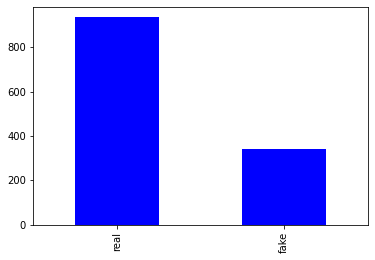

In [6]:
print(label.value_counts()) # not covered
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')

### Convering label into "0" or "1"

In [7]:
import numpy as np
#classes_list = ["fake","real"]
label_index = data['label']
#label_index.replace('real', 0)
#label_index.replace('fake', 1)

label_index = [0 if x == "real" else 1 for x in label_index]
final_label = np.asarray(label_index)
print(final_label[:10])

[1 1 1 1 0 1 1 0 1 1]


In [8]:
from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=2)

In [9]:
print(label_twoDimension[:10])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


### Making of "text" Variable

In [10]:
text = data['text']
text.head(10)

0    这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭😭 不是晚一点，是你不会si的...
1    #北京健康宝崩了#，没了健康宝，什么也做不了，#北京# 上班也迟到了，希望能尽快修好，加油健...
2    【疫情当前，大意不得：全国已有12起复工后聚集性疫情发生】近期全国陆续复工，据不完全统计，复...
3    学校开学时间：高三，初三，3月2日开学，高一，高二，初一，初二，3月9日开学，小学4一6年级...
4    【#美国新冠确诊病例超590万例#】据美国约翰斯·霍普金斯大学全球新冠肺炎疫情实时监测系统显...
5    美国的10艘医疗军舰已经开进纽约港，每艘船上有1000张病床，上面拥有所有的医疗抢救设施，每...
6    #北京疫情扩散风险很高#，北京疫情严峻，84岁的钟南山院士再次出征北京， 他就是最耀眼的一颗...
7    【#中南医院接管武汉雷神山医院#】2月8日晚，武汉大学中南医院正式接管武汉雷神山医院，中南医...
8    这是武汉一个小区居民用高浓度酒精室内消毒，引发火灾！#市民逃生时还不忘戴上口罩# 大家注意，...
9    特大利好：  美国公共安全卫生部门经特朗普特批，同意将吉利德公司的新冠肺炎抑制药瑞德西韦药物...
Name: text, dtype: object

### Dataset Pre-processing

In [11]:
import re 
# !pip install text_cleaner
# from text_cleaner import remove
# from text_cleaner.processor.chinese import CHINESE, CHINESE_SYMBOLS_AND_PUNCTUATION

def text_clean(text):
    pattern = re.compile(u'[^0-9a-zA-Z\u4e00-\u9fa5.，,。？“”]+', re.UNICODE)
    return pattern.sub('', text.strip())
#     ''' Pre process and convert texts to a list of words '''
    
#     text=text.lower()

#     # Clean the text
#     text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
#     text = re.sub(r"what's", "what is ", text)
#     text = re.sub(r"I'm", "I am ", text)
#     text = re.sub(r"\'s", " ", text)
#     text = re.sub(r"\'ve", " have ", text)
#     text = re.sub(r"can't", "cannot ", text)
#     text = re.sub(r"wouldn't", "would not ", text)
#     text = re.sub(r"shouldn't", "should not ", text)
#     text = re.sub(r"shouldn", "should not ", text)
#     text = re.sub(r"didn", "did not ", text)
#     text = re.sub(r"n't", " not ", text)
#     text = re.sub(r"i'm", "i am ", text)
#     text = re.sub(r"\'re", " are ", text)
#     text = re.sub(r"\'d", " would ", text)
#     text = re.sub(r"\'ll", " will ", text)
#     text = re.sub('https?://\S+|www\.\S+', "", text)
#     text = re.sub(r",", " ", text)
#     text = re.sub(r"\.", " ", text)
#     text = re.sub(r"!", " ! ", text)
#     text = re.sub(r"\/", " ", text)
#     text = re.sub(r"\^", " ^ ", text)
#     text = re.sub(r"\+", " + ", text)
#     text = re.sub(r"\-", " - ", text)
#     text = re.sub(r"\=", " = ", text)
#     text = re.sub(r"'", " ", text)
#     text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
#     text = re.sub(r":", " : ", text)
#     text = re.sub(r" e g ", " eg ", text)
#     text = re.sub(r" b g ", " bg ", text)
#     text = re.sub(r" u s ", " american ", text)
#     text = re.sub(r"\0s", "0", text)
#     text = re.sub(r" 9 11 ", "911", text)
#     text = re.sub(r"e - mail", "email", text)
#     text = re.sub(r"j k", "jk", text)
#     text = re.sub(r"\s{2,}", " ", text)
#     text = re.sub(r"[0-9]", "", text)
    
#     # text = re.sub(r"rt", " ", text)

  
#     return text

In [12]:
clean_text = text.apply(lambda x:text_clean(x))

In [13]:
clean_text.head(10)

0    这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭不是晚一点，是你不会si的，加...
1    北京健康宝崩了，没了健康宝，什么也做不了，北京上班也迟到了，希望能尽快修好，加油健康宝L北京...
2    疫情当前，大意不得全国已有12起复工后聚集性疫情发生近期全国陆续复工，据不完全统计，复工后发...
3    学校开学时间高三，初三，3月2日开学，高一，高二，初一，初二，3月9日开学，小学4一6年级，...
4    美国新冠确诊病例超590万例据美国约翰斯霍普金斯大学全球新冠肺炎疫情实时监测系统显示，截至美...
5    美国的10艘医疗军舰已经开进纽约港，每艘船上有1000张病床，上面拥有所有的医疗抢救设施，每...
6    北京疫情扩散风险很高，北京疫情严峻，84岁的钟南山院士再次出征北京，他就是最耀眼的一颗星，为...
7    中南医院接管武汉雷神山医院2月8日晚，武汉大学中南医院正式接管武汉雷神山医院，中南医院院长王...
8    这是武汉一个小区居民用高浓度酒精室内消毒，引发火灾市民逃生时还不忘戴上口罩大家注意，如果家里...
9    特大利好美国公共安全卫生部门经特朗普特批，同意将吉利德公司的新冠肺炎抑制药瑞德西韦药物专利豁...
Name: text, dtype: object

In [14]:
!pip install jieba
import jieba
def fenci(text1):
    text1=jieba.cut(text1)
    return " ".join(text1)

clean_text = clean_text.apply(lambda x:fenci(x))
clean_text.head(10)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.986 seconds.
Prefix dict has been built successfully.


0    这是 发生 在 重症 隔离病房 里 ， 一个 小朋友 对 医生 说 的话 我 不想 让 妈妈...
1    北京 健康 宝崩 了 ， 没 了 健康 宝 ， 什么 也 做不了 ， 北京 上班 也 迟到 ...
2    疫情 当前 ， 大意 不得 全国 已有 12 起 复工 后 聚集 性 疫情 发生 近期 全国...
3    学校 开学 时间 高三 ， 初三 ， 3 月 2 日 开学 ， 高一 ， 高二 ， 初一 ，...
4    美国 新冠 确诊 病例 超 590 万例 据 美国 约翰斯 霍普金斯大学 全球 新冠 肺炎 ...
5    美国 的 10 艘 医疗 军舰 已经 开进 纽约港 ， 每艘 船上 有 1000 张 病床 ...
6    北京 疫情 扩散 风险 很 高 ， 北京 疫情 严峻 ， 84 岁 的 钟南山 院士 再次 ...
7    中南 医院 接管 武汉 雷 神山 医院 2 月 8 日晚 ， 武汉大学 中南 医院 正式 接...
8    这是 武汉 一个 小区 居民 用 高浓度 酒精 室内 消毒 ， 引发 火灾 市民 逃生 时 ...
9    特大 利好 美国 公共安全 卫生部门 经 特朗普 特批 ， 同意 将 吉利 德 公司 的 新...
Name: text, dtype: object

### Removing stopwords

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
!pip install stopwordsiso
from stopwordsiso import stopwords
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords("zh")]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 81kB 3.7MB/s 


In [16]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [17]:
print(clean_text_ns.head(10))

0    这是 发生 重症 隔离病房 里 小朋友 医生 不想 妈妈 哭 晚一点 不会 si 加油 医护...
1    北京 健康 宝崩 没 健康 宝 做不了 北京 上班 迟到 希望 尽快 修好 加油 健康 宝 ...
2    疫情 当前 大意 全国 已有 12 复工 聚集 性 疫情 发生 近期 全国 陆续 复工 完全...
3    学校 开学 时间 高三 初三 3 2 开学 高一 高二 初一 初二 3 9 开学 小学 4 ...
4    美国 新冠 确诊 病例 超 590 万例 美国 约翰斯 霍普金斯大学 全球 新冠 肺炎 疫情...
5    美国 10 艘 医疗 军舰 已经 开进 纽约港 每艘 船上 1000 张 病床 上面 拥有 ...
6    北京 疫情 扩散 风险 高 北京 疫情 严峻 84 岁 钟南山 院士 再次 出征 北京 耀眼...
7    中南 医院 接管 武汉 雷 神山 医院 2 8 日晚 武汉大学 中南 医院 正式 接管 武汉...
8    这是 武汉 小区 居民 高浓度 酒精 室内 消毒 引发 火灾 市民 逃生 忘 戴 口罩 注意...
9    特大 利好 美国 公共安全 卫生部门 特朗普 特批 同意 吉利 德 公司 新冠 肺炎 抑制 ...
Name: text, dtype: object


### Lemmatization

In [18]:
"""# Lemmatization 
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = "".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text"""

'# Lemmatization \nimport nltk\nnltk.download(\'wordnet\')\nfrom nltk.stem import WordNetLemmatizer\nlemmatizer = WordNetLemmatizer()\n\ndef word_lemmatizer(text):\n    lem_text = "".join([lemmatizer.lemmatize(i) for i in text])\n    return lem_text'

In [19]:
"""clean_text_lem = clean_text_ns.apply(lambda x : word_lemmatizer(x))"""

'clean_text_lem = clean_text_ns.apply(lambda x : word_lemmatizer(x))'

In [20]:
"""print(clean_text_lem.head(10))"""

'print(clean_text_lem.head(10))'

### Stemming

In [21]:
clean_text_stem = clean_text_ns

In [22]:
print(clean_text_stem.head(10))

0    这是 发生 重症 隔离病房 里 小朋友 医生 不想 妈妈 哭 晚一点 不会 si 加油 医护...
1    北京 健康 宝崩 没 健康 宝 做不了 北京 上班 迟到 希望 尽快 修好 加油 健康 宝 ...
2    疫情 当前 大意 全国 已有 12 复工 聚集 性 疫情 发生 近期 全国 陆续 复工 完全...
3    学校 开学 时间 高三 初三 3 2 开学 高一 高二 初一 初二 3 9 开学 小学 4 ...
4    美国 新冠 确诊 病例 超 590 万例 美国 约翰斯 霍普金斯大学 全球 新冠 肺炎 疫情...
5    美国 10 艘 医疗 军舰 已经 开进 纽约港 每艘 船上 1000 张 病床 上面 拥有 ...
6    北京 疫情 扩散 风险 高 北京 疫情 严峻 84 岁 钟南山 院士 再次 出征 北京 耀眼...
7    中南 医院 接管 武汉 雷 神山 医院 2 8 日晚 武汉大学 中南 医院 正式 接管 武汉...
8    这是 武汉 小区 居民 高浓度 酒精 室内 消毒 引发 火灾 市民 逃生 忘 戴 口罩 注意...
9    特大 利好 美国 公共安全 卫生部门 特朗普 特批 同意 吉利 德 公司 新冠 肺炎 抑制 ...
Name: text, dtype: object


In [23]:
# final_text = [x for x in clean_text_lem if len(x) > 3]

In [24]:
#print(final_text)

### Tokenization using "keras"

In [25]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)

### Making Vocab for words

In [26]:
vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)

13894


In [27]:
l = tok_all.word_index
print(l)

{'例': 1, '病例': 2, '确诊': 3, '疫情': 4, '新冠': 5, '肺炎': 6, '美国': 7, '新增': 8, '“': 9, '”': 10, '中国': 11, '3': 12, '1': 13, '视频': 14, '2': 15, '检测': 16, '7': 17, '6': 18, 'l': 19, '4': 20, '武汉': 21, '微博': 22, '累计': 23, '隔离': 24, '医院': 25, '报告': 26, '病毒': 27, '5': 28, '北京': 29, '防控': 30, '人民日报': 31, '死亡': 32, '输入': 33, '工作': 34, '抗疫': 35, '24': 36, '核酸': 37, '境外': 38, '国家': 39, '全球': 40, '患者': 41, '天': 42, '出院': 43, '时间': 44, '人员': 45, '口罩': 46, '无症状': 47, '8': 48, '感染者': 49, '治疗': 50, '岁': 51, '感染': 52, 'o': 53, '人民': 54, '10': 55, '均': 56, '进行': 57, '湖北': 58, '医疗': 59, '目前': 60, '冠状病毒': 61, '治愈': 62, '新型': 63, '组织': 64, '医生': 65, '20': 66, '14': 67, '表示': 68, '万': 69, '密切接触': 70, '症状': 71, '正在': 72, '健康': 73, '18': 74, '9': 75, '阳性': 76, '集中': 77, '没有': 78, '医学观察': 79, '15': 80, '情况': 81, '世卫': 82, '16': 83, '超': 84, '0': 85, '12': 86, '发布': 87, '新闻': 88, '记者': 89, '2020': 90, '出现': 91, '22': 92, '新': 93, '专家': 94, '一线': 95, '11': 96, '17': 97, '发布会': 98, '已经': 99, '现有': 100, '全国': 101, '直播'

### encoding or sequencing

In [28]:
encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[1])
print(encoded_clean_text_stem[1])

北京 健康 宝崩 没 健康 宝 做不了 北京 上班 迟到 希望 尽快 修好 加油 健康 宝 L 北京 北京 事儿 微博 视频
[29, 73, 2069, 248, 73, 1845, 3428, 29, 366, 6694, 186, 662, 2070, 149, 73, 1845, 19, 29, 29, 2071, 22, 14]


### Pre-padding

In [29]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')

# Test Data Pre-processing

# Data test Reading

In [30]:
data_t = pd.read_csv('drive/MyDrive/Constraint_Competition_Dataset/news_total.csv')
#data_t = total[1500:]
pd.set_option('display.max_colwidth',150)
data_t.head()

,label,id,date,user_id,text,pic_url,video_url,comment_num,repost_num,like_num
0,real,be3d74871a5df3a0da2a98dd32e8469f,2020-08-23 18:57,43a971db6364c4ed7cd101feca243600,【转存！#施一公说诚实做学问是绝不容突破的底线#】今天，在西湖大学博士研究生开学典礼上，校长施一公致辞时说：“新冠疫情绝不是人类面临的唯一危机或最后难题，它只是人类历史长河中又一次新的挑战。我们正在面对百年未有之大变局，要想在变局中开新局，科学与技术的价值和力量日益显现。做诚实的学问是科学研...,[],http://f.video.weibocdn.com/DJBbVGUwlx07FRoDjauY01041200tpih0E010.mp4?label=mp4_720p&template=1280x720.25.0&trans_finger=1f0da16358befad33323e3a1b...,396,601,3955
1,real,1a213783461da197779f9f6a4f118e13,2020-02-18 17:12,43a971db6364c4ed7cd101feca243600,【#区长回应网传北京西城区政府停摆#：目前运转一切正常】2月18日，在北京市新型冠状病毒肺炎疫情防控工作新闻发布会上，西城区区长孙硕针对网传“西城区某部门出现一例新冠肺炎确诊病例，导致西城区政府工作停摆”的情况，表示西城区委区政府机关目前运转一切正常。孙硕说，西城区某部门的确发现一例新冠肺炎...,['https://wx1.sinaimg.cn/orj360/a716fd45ly1gc0ox5gczvj20ge0d0q4n.jpg'],NaN,765,345,4949
2,real,89c3927b85cc27fea583677d00ee6454,2020-04-21 18:38,43a971db6364c4ed7cd101feca243600,【最新：#全球新冠肺炎感染人数超244万例#】截至北京时间4月21日16时，211个国家和地区累计确诊2441337例，“钻石公主”号邮轮712例，#全球累计死亡170075例#。转发关注#新冠肺炎疫情全球走势#↓↓ ​​​​,['https://wx3.sinaimg.cn/orj360/a716fd45gy1ge1ko47j6fj20u02dkx6q.jpg'],NaN,670,606,3510
3,fake,460b078edd44280dc2535535add5d2fa,2020-02-06 10:48,8b1bc48b06fb7ad014182cc91be44156,这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭😭 不是晚一点，是你不会si的，加油，医护人员是不会让你si的，坚强，加油🙏#人生第一次我们这样过年##疫情结束后你最想干什么# L情感依梦的微博视频 ​​​​,[],http://f.video.weibocdn.com/000lGgVrlx07AJGBulao010412000Utx0E010.mp4?label=mp4_hd&template=544x960.24.0&trans_finger=7c347e6ee1691b93dc7e5726f4ef...,4,2,30
4,real,799a54dfe5472de93613dab44f22014e,2020-05-01 08:21,43a971db6364c4ed7cd101feca243600,【今天，发条微博，迎接#五月#】5月，向每一位奋斗中的劳动者致敬；5月，为奋斗中的青年点赞；5月，向妈妈表达爱意；5月，向抗疫逆行的医护致敬…这个温暖的季节来之不易，不蹉跎，不虚度！转存这份五月主题壁纸↓↓#2020年还剩下三分之二#，加油前行！ ​​​​,"['https://wx4.sinaimg.cn/orj360/a716fd45ly1gecn13iinwj20u01hcnpd.jpg', 'https://wx3.sinaimg.cn/orj360/a716fd45ly1gecn147th8j20u01hcnpd.jpg', 'http...",NaN,2471,10110,23223


In [31]:
data_t.shape

(2120, 10)

In [32]:
print(data_t.dtypes)

label          object
id             object
date           object
user_id        object
text           object
pic_url        object
video_url      object
comment_num     int64
repost_num      int64
like_num        int64
dtype: object


# Making of "label" Variable

In [33]:
label_t = data_t['label']
label_t.head()

0    real
1    real
2    real
3    fake
4    real
Name: label, dtype: object

# Checking Dataset Balancing

real    1776
fake     344
Name: label, dtype: int64


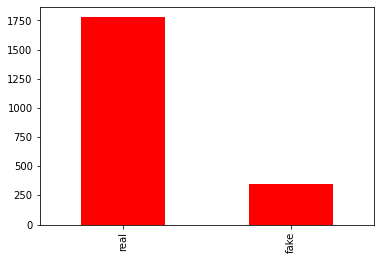

In [34]:
print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')

# Convering label into "0" or "1"

In [35]:
# import numpy as np
# classes_list_t = ["fake","real"]
# label_t_index = data_t['label']
# final_label_t = np.asarray(label_t_index)
# print(final_label_t[:10])



import numpy as np
classes_list = ["fake","real"]
label_t_index = data_t['label']
#label_index.replace('real', 0)
#label_index.replace('fake', 1)

label_t_index = [0 if x == "real" else 1 for x in label_t_index]
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])

[0 0 0 1 0 0 0 0 0 1]


In [36]:
from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=2)

In [37]:
print(label_twoDimension_t[:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


# Making of "text" Variable

In [38]:
text_t = data_t['text']
text_t.head(10)

0    【转存！#施一公说诚实做学问是绝不容突破的底线#】今天，在西湖大学博士研究生开学典礼上，校长施一公致辞时说：“新冠疫情绝不是人类面临的唯一危机或最后难题，它只是人类历史长河中又一次新的挑战。我们正在面对百年未有之大变局，要想在变局中开新局，科学与技术的价值和力量日益显现。做诚实的学问是科学研...
1    【#区长回应网传北京西城区政府停摆#：目前运转一切正常】2月18日，在北京市新型冠状病毒肺炎疫情防控工作新闻发布会上，西城区区长孙硕针对网传“西城区某部门出现一例新冠肺炎确诊病例，导致西城区政府工作停摆”的情况，表示西城区委区政府机关目前运转一切正常。孙硕说，西城区某部门的确发现一例新冠肺炎...
2                                        【最新：#全球新冠肺炎感染人数超244万例#】截至北京时间4月21日16时，211个国家和地区累计确诊2441337例，“钻石公主”号邮轮712例，#全球累计死亡170075例#。转发关注#新冠肺炎疫情全球走势#↓↓ ​​​​
3                                          这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭😭 不是晚一点，是你不会si的，加油，医护人员是不会让你si的，坚强，加油🙏#人生第一次我们这样过年##疫情结束后你最想干什么# L情感依梦的微博视频 ​​​​
4                         【今天，发条微博，迎接#五月#】5月，向每一位奋斗中的劳动者致敬；5月，为奋斗中的青年点赞；5月，向妈妈表达爱意；5月，向抗疫逆行的医护致敬…这个温暖的季节来之不易，不蹉跎，不虚度！转存这份五月主题壁纸↓↓#2020年还剩下三分之二#，加油前行！ ​​​​
5    【#大连关停凯洋海鲜公司及周边企业#】今天上午，大连举行新冠肺炎疫情防控工作发布会。会上通报，疫情发生后，大连甘井子区在7月22日立即关停凯洋海鲜公司，转运企业人员进行集中隔离、核酸检测；7月23日，除保障群众生活和重要国计民生的企业正常运作外，对大连湾区域其他企业全部关停，对辖区全域实施封...
6    【#美国新冠感染病例超过117万#，#新模型预测美国8月初死亡病例将超13万#】据美国约翰斯·霍普金斯大学疫情实时监测系统统计，截

# **Dataset Pre-processing**
1. Remove unwanted words
2. Stopwords removal
3. Stemming
4. Tokenization
5. Encoding or Sequencing
6. Pre-padding

### 1. Removing Unwanted Words

In [39]:
import re 

def text_clean(text):
    pattern = re.compile(u'[^0-9a-zA-Z\u4e00-\u9fa5.，,。？“”]+', re.UNICODE)
    return pattern.sub('', text.strip())
    # text = re.sub(r"rt", " ", text)

In [40]:
clean_text_t = text_t.apply(lambda x:text_clean(x))

In [41]:
clean_text_t.head(10)

0    转存施一公说诚实做学问是绝不容突破的底线今天，在西湖大学博士研究生开学典礼上，校长施一公致辞时说“新冠疫情绝不是人类面临的唯一危机或最后难题，它只是人类历史长河中又一次新的挑战。我们正在面对百年未有之大变局，要想在变局中开新局，科学与技术的价值和力量日益显现。做诚实的学问是科学研究中一条不容...
1    区长回应网传北京西城区政府停摆目前运转一切正常2月18日，在北京市新型冠状病毒肺炎疫情防控工作新闻发布会上，西城区区长孙硕针对网传“西城区某部门出现一例新冠肺炎确诊病例，导致西城区政府工作停摆”的情况，表示西城区委区政府机关目前运转一切正常。孙硕说，西城区某部门的确发现一例新冠肺炎确诊病例。...
2                                                        最新全球新冠肺炎感染人数超244万例截至北京时间4月21日16时，211个国家和地区累计确诊2441337例，“钻石公主”号邮轮712例，全球累计死亡170075例。转发关注新冠肺炎疫情全球走势
3                                                       这是发生在重症隔离病房里，一个小朋友对医生说的话我不想让妈妈哭不是晚一点，是你不会si的，加油，医护人员是不会让你si的，坚强，加油人生第一次我们这样过年疫情结束后你最想干什么L情感依梦的微博视频
4                                            今天，发条微博，迎接五月5月，向每一位奋斗中的劳动者致敬5月，为奋斗中的青年点赞5月，向妈妈表达爱意5月，向抗疫逆行的医护致敬这个温暖的季节来之不易，不蹉跎，不虚度转存这份五月主题壁纸2020年还剩下三分之二，加油前行
5    大连关停凯洋海鲜公司及周边企业今天上午，大连举行新冠肺炎疫情防控工作发布会。会上通报，疫情发生后，大连甘井子区在7月22日立即关停凯洋海鲜公司，转运企业人员进行集中隔离核酸检测7月23日，除保障群众生活和重要国计民生的企业正常运作外，对大连湾区域其他企业全部关停，对辖区全域实施封闭管理，居民...
6    美国新冠感染病例超过117万，新模型预测美国8月初死亡病例将超13万据美国约翰斯霍普金斯大学疫情实时监测系统统计，截至美东时间5月

In [42]:
!pip install jieba
import jieba
def fenci(text1):
    text1=jieba.cut(text1)
    return " ".join(text1)

clean_text_t = clean_text_t.apply(lambda x:fenci(x))
clean_text_t.head(10)

0    转存 施一公说 诚实 做学问 是 绝不 容 突破 的 底线 今天 ， 在 西湖 大学 博士 研究生 开学典礼 上 ， 校长 施一公 致辞 时说 “ 新冠 疫情 绝不 是 人类 面临 的 唯一 危机 或 最后 难题 ， 它 只是 人类 历史长河 中 又 一次 新 的 挑战 。 我们 正在 面对...
1    区长 回应 网传 北京 西城区 政府 停摆 目前 运转 一切正常 2 月 18 日 ， 在 北京市 新型 冠状病毒 肺炎 疫情 防控 工作 新闻 发布会 上 ， 西城区 区长 孙硕 针对 网传 “ 西城区 某 部门 出现 一例 新冠 肺炎 确诊 病例 ， 导致 西城区 政府 工作 停摆 ” ...
2      最新 全球 新冠 肺炎 感染 人数 超 244 万例 截至 北京 时间 4 月 21 日 16 时 ， 211 个 国家 和 地区 累计 确诊 2441337 例 ， “ 钻石 公主 ” 号 邮轮 712 例 ， 全球 累计 死亡 170075 例 。 转发 关注 新冠 肺炎 疫情 全球 走势
3    这是 发生 在 重症 隔离病房 里 ， 一个 小朋友 对 医生 说 的话 我 不想 让 妈妈 哭 不是 晚一点 ， 是 你 不会 si 的 ， 加油 ， 医护人员 是 不会 让 你 si 的 ， 坚强 ， 加油 人生 第一次 我们 这样 过年 疫情 结束 后 你 最 想干什么 L 情感 依梦...
4    今天 ， 发条 微博 ， 迎接 五月 5 月 ， 向 每 一位 奋斗 中 的 劳动者 致敬 5 月 ， 为 奋斗 中 的 青年 点赞 5 月 ， 向 妈妈 表达 爱意 5 月 ， 向 抗疫 逆行 的 医护 致敬 这个 温暖 的 季节 来之不易 ， 不 蹉跎 ， 不 虚度 转存 这份 五月 主...
5    大连 关停 凯洋 海鲜 公司 及 周边 企业 今天上午 ， 大连 举行 新冠 肺炎 疫情 防控 工作 发布会 。 会上 通报 ， 疫情 发生 后 ， 大连 甘井子区 在 7 月 22 日 立即 关停 凯洋 海鲜 公司 ， 转运 企业 人员 进行 集中 隔离 核酸 检测 7 月 23 日 ， ...
6    美国 新冠 感染 病例 超过 117 万 ， 新 模型 预测 美国 8 月初 死亡 病例 将 超 13 万据 美国 约翰斯 霍普金

### 2. Removing Stopwords

In [43]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
!pip install stopwordsiso
from stopwordsiso import stopwords
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords("zh")]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [45]:
print(clean_text_t_ns.head(10))

0    转存 施一公说 诚实 做学问 绝不 容 突破 底线 今天 西湖 大学 博士 研究生 开学典礼 校长 施一公 致辞 时说 “ 新冠 疫情 绝不 人类 面临 唯一 危机 最后 难题 人类 历史长河 一次 新 挑战 正在 面对 百年 未有 大变局 想 变局 中开 新局 科学 技术 价值 力量 日益...
1    区长 回应 网传 北京 西城区 政府 停摆 目前 运转 一切正常 2 18 北京市 新型 冠状病毒 肺炎 疫情 防控 工作 新闻 发布会 西城区 区长 孙硕 网传 “ 西城区 部门 出现 一例 新冠 肺炎 确诊 病例 导致 西城区 政府 工作 停摆 ” 情况 表示 西城 区委 区政府 机关 ...
2                           最新 全球 新冠 肺炎 感染 人数 超 244 万例 北京 时间 4 21 16 211 国家 地区 累计 确诊 2441337 例 “ 钻石 公主 ” 号 邮轮 712 例 全球 累计 死亡 170075 例 转发 关注 新冠 肺炎 疫情 全球 走势
3                                                          这是 发生 重症 隔离病房 里 小朋友 医生 不想 妈妈 哭 晚一点 不会 si 加油 医护人员 不会 si 坚强 加油 人生 第一次 过年 疫情 结束 想干什么 L 情感 依梦 微博 视频
4                                     今天 发条 微博 迎接 五月 5 一位 奋斗 劳动者 致敬 5 奋斗 青年 点赞 5 妈妈 表达 爱意 5 抗疫 逆行 医护 致敬 温暖 季节 来之不易 蹉跎 虚度 转存 这份 五月 主题 壁纸 2020 剩下 三分之二 加油 前行
5    大连 关停 凯洋 海鲜 公司 周边 企业 今天上午 大连 举行 新冠 肺炎 疫情 防控 工作 发布会 会上 通报 疫情 发生 大连 甘井子区 7 22 立即 关停 凯洋 海鲜 公司 转运 企业 人员 进行 集中 隔离 核酸 检测 7 23 保障 群众 生活 重要 国计民生 企业 正常 运作 ...
6    美国 新冠 感染 病例 超过 117 万 新 模型 预测 美国 8 月初 死亡 病例 超 13 万据 美国 约翰斯 霍普金斯大学 

### 3. Stemming

In [46]:
# Stemming
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text

In [47]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [48]:
print(clean_text_t_stem.head(10))

0    转存 施一公说 诚实 做学问 绝不 容 突破 底线 今天 西湖 大学 博士 研究生 开学典礼 校长 施一公 致辞 时说 “ 新冠 疫情 绝不 人类 面临 唯一 危机 最后 难题 人类 历史长河 一次 新 挑战 正在 面对 百年 未有 大变局 想 变局 中开 新局 科学 技术 价值 力量 日益...
1    区长 回应 网传 北京 西城区 政府 停摆 目前 运转 一切正常 2 18 北京市 新型 冠状病毒 肺炎 疫情 防控 工作 新闻 发布会 西城区 区长 孙硕 网传 “ 西城区 部门 出现 一例 新冠 肺炎 确诊 病例 导致 西城区 政府 工作 停摆 ” 情况 表示 西城 区委 区政府 机关 ...
2                           最新 全球 新冠 肺炎 感染 人数 超 244 万例 北京 时间 4 21 16 211 国家 地区 累计 确诊 2441337 例 “ 钻石 公主 ” 号 邮轮 712 例 全球 累计 死亡 170075 例 转发 关注 新冠 肺炎 疫情 全球 走势
3                                                          这是 发生 重症 隔离病房 里 小朋友 医生 不想 妈妈 哭 晚一点 不会 si 加油 医护人员 不会 si 坚强 加油 人生 第一次 过年 疫情 结束 想干什么 L 情感 依梦 微博 视频
4                                     今天 发条 微博 迎接 五月 5 一位 奋斗 劳动者 致敬 5 奋斗 青年 点赞 5 妈妈 表达 爱意 5 抗疫 逆行 医护 致敬 温暖 季节 来之不易 蹉跎 虚度 转存 这份 五月 主题 壁纸 2020 剩下 三分之二 加油 前行
5    大连 关停 凯洋 海鲜 公司 周边 企业 今天上午 大连 举行 新冠 肺炎 疫情 防控 工作 发布会 会上 通报 疫情 发生 大连 甘井子区 7 22 立即 关停 凯洋 海鲜 公司 转运 企业 人员 进行 集中 隔离 核酸 检测 7 23 保障 群众 生活 重要 国计民生 企业 正常 运作 ...
6    美国 新冠 感染 病例 超过 117 万 新 模型 预测 美国 8 月初 死亡 病例 超 13 万据 美国 约翰斯 霍普金斯大学 

### 4. Tokenization

In [49]:
import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)

In [50]:
vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)

19397


In [51]:
test_list = tok_test.word_index
print(test_list)

{'例': 1, '病例': 2, '确诊': 3, '新冠': 4, '疫情': 5, '肺炎': 6, '新增': 7, '美国': 8, '“': 9, '”': 10, '3': 11, '1': 12, '7': 13, '检测': 14, '中国': 15, '2': 16, '视频': 17, '6': 18, '隔离': 19, '累计': 20, '5': 21, '4': 22, '死亡': 23, '报告': 24, 'l': 25, '防控': 26, '病毒': 27, '人民日报': 28, '北京': 29, '核酸': 30, '微博': 31, '武汉': 32, '医院': 33, '输入': 34, '工作': 35, '24': 36, '抗疫': 37, '境外': 38, '患者': 39, '天': 40, '时间': 41, '出院': 42, '国家': 43, '全球': 44, '感染者': 45, '无症状': 46, '人员': 47, '目前': 48, '8': 49, '感染': 50, '岁': 51, '口罩': 52, '进行': 53, '密切接触': 54, '阳性': 55, '10': 56, 'o': 57, '治疗': 58, '人民': 59, '表示': 60, '均': 61, '14': 62, '医学观察': 63, '湖北': 64, '治愈': 65, '正在': 66, '集中': 67, '冠状病毒': 68, '组织': 69, '20': 70, '新型': 71, '18': 72, '9': 73, '症状': 74, '超': 75, '15': 76, '12': 77, '新闻': 78, '健康': 79, '现有': 80, '17': 81, '医疗': 82, '万': 83, '世卫': 84, '0': 85, '情况': 86, '出现': 87, '记者': 88, '发布': 89, '新': 90, '没有': 91, '发布会': 92, '11': 93, '22': 94, '30': 95, '16': 96, '一线': 97, '观察': 98, '重症': 99, '疑似病例': 100, '战疫': 101, '直播'

### 5. Encoding or Sequencing

In [52]:
encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
#print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])

[2596, 5723, 13498, 2909, 200, 4834, 579, 1642, 1937, 4694, 5594, 9, 5, 4, 5723, 255, 1121, 988, 2190, 415, 9275, 255, 956, 93, 3130, 72, 1197, 6347, 520, 406, 375, 2690, 710, 6414, 5213, 3815, 6256, 13498, 2909, 10, 19, 4008, 14, 22, 14]


### 6. Pre-padding

In [53]:
from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')

# Embedding

In [ ]:
# GloVe Embedding link - https://nlp.stanford.edu/projects/glove/

import os
import numpy as np
!pip install fasttext
import fasttext.util
#fasttext.util.download_model('zh', if_exists='ignore') 
#f = fasttext.load_model('cc.zh.300.bin')
# from gensim.models.keyedvectors import KeyedVectors
# file = open('drive/MyDrive/Embeddings/glove.6B.300d.txt')
# wv_from_text = KeyedVectors.load_word2vec_format(file, binary=False)


embeddings_index = {}
f = 'drive/MyDrive/Embeddings/cc.zh.300.bin'

import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    # n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = map(float, tokens[1:])
    return data

embeddings_index = load_vectors(f)
print('Loaded %s word vectors.' % len(embeddings_index))

     |████████████████████████████████| 71kB 3.1MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3093286 sha256=3fb60ca962b6bcc9df33d1e1bdd71193bb0b45c755d55b2d454d91275b0a172a
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
	embedding_vector = embeddings_index.get(word)
	print(embedding_vector)
	if embedding_vector is not None:
		print(embedding_vector)
		embedding_matrix[i] = embedding_vector
    

# **CNN Model**

In [ ]:
from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq

In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length, trainable=False)

In [ ]:
CNN2_model=Sequential([Embedding_Layer,
                        Conv1D(128,5,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(64,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Conv1D(32,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dense(2,activation="sigmoid")
                       
                       ])

In [ ]:
CNN2_model.summary()

In [ ]:
from keras.optimizers import Adam
CNN2_model.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN2_model, to_file='CNN2_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=10, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=4, min_lr=0.00001, verbose=1)

### **Model Fitting or Training**

In [ ]:
hist = CNN2_model.fit(padded_clean_text_stem,label_twoDimension,validation_data=(padded_clean_text_t_stem,label_twoDimension_t),epochs=100,batch_size=32,callbacks=[earlystopper,reduce_lr])

# log loss

In [ ]:
CNN2_model_predictions = CNN2_model.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN2_model_predictions)
log_loss_test

# Classification Report

In [ ]:
predictions = np.zeros_like(CNN2_model_predictions)
predictions[np.arange(len(CNN2_model_predictions)), CNN2_model_predictions.argmax(1)] = 1

In [ ]:
predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger

In [ ]:
'''pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["label"])
print(df)'''

In [ ]:
'''df.to_csv("submission_EN_A.csv", index=False)'''

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))

# Epoch v/s Loss Plot

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN2_HASOC_Eng_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN2_HASOC_Eng_lossPlot.pdf') 

# Epoch v/s Accuracy Plot

In [ ]:
plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN2_HASOC_Eng_accuracyPlot.pdf',dpi=1000)
files.download('CNN2_HASOC_Eng_accuracyPlot.pdf') 

# Area under Curve-ROC

In [ ]:
pred_train = CNN2_model.predict(padded_clean_text_stem)
pred_test = CNN2_model.predict(padded_clean_text_t_stem)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN2_HASOC_Eng_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN2_HASOC_Eng_Area_RocPlot.pdf')

  

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)